# Deep Learning 

<a id="1"></a> <br>
# INTRODUCTION
* **Deep learning:** One of the machine learning technique that learns features directly from data. 
* **Why deep learning:** When the amounth of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy.
<a href="http://ibb.co/m2bxcc"><img src="http://preview.ibb.co/d3CEOH/1.png" alt="1" border="0"></a>
* **What is amounth of big:** It is hard to answer but intuitively 1 million sample is enough to say "big amounth of data"
* **Usage fields of deep learning:** Speech recognition, image classification, natural language procession (nlp) or recommendation systems
* **What is difference of deep learning from machine learning:** 
    * Machine learning covers deep learning. 
    * Features are given machine learning manually.
    * On the other hand, deep learning learns features directly from data.
<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>

<br>Lets look at our data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

<a id="Overview the Data Set"></a> <br>
# Overview the Data Set
* We will use "sign language digits data set" for this tutorial.
* In this data there are 2062 sign language digits images.
* As you know digits are from 0 to 9. Therefore there are 10 unique sign.
* At the beginning of tutorial we will use only sign 0 and 1 for simplicity. 
* In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
* Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).
* Note: Actually 205 sample is very very very little for deep learning. But this is tutorial so it does not matter so much. 
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

In [2]:
# load data set
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
print(len(x_l))

2062


In [3]:
x_l

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [4]:
x_l[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [5]:
len(x_l[0])

64

In [6]:
len(x_l[0][0])

64

In [7]:
x_l[0].shape

(64, 64)

In [8]:
#64*64

In [9]:
Y_l

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
Y_l[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

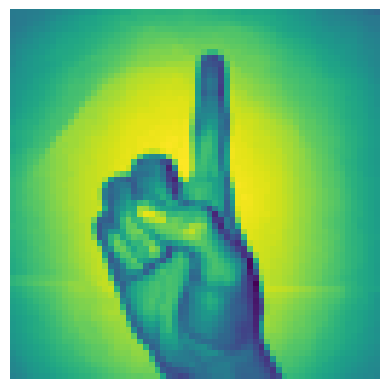

In [11]:
img_size = 64
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()

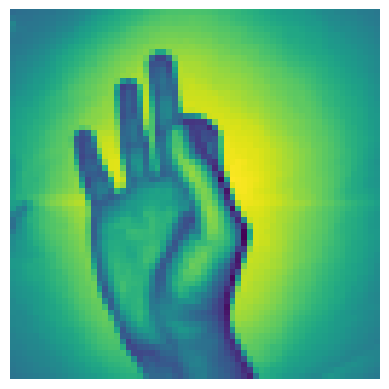

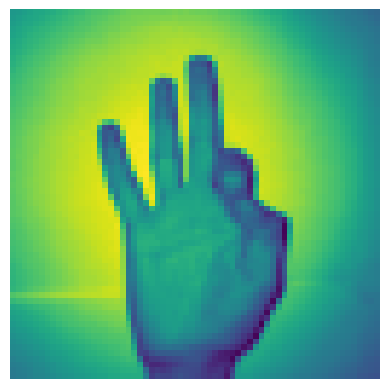

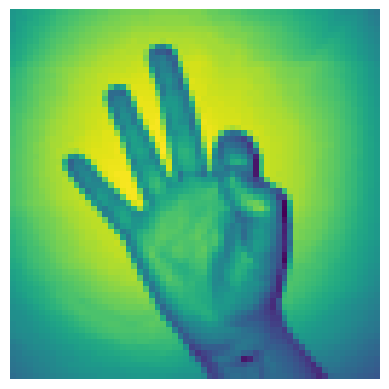

In [12]:
img_size = 64
for i in range(3):#len(x_l)
    plt.imshow(x_l[i].reshape(img_size, img_size))
    plt.axis('off')
    plt.show()

* In order to create image array, I concatenate zero sign and one sign arrays
* Then I create label array 0 for zero sign images and 1 for one sign images.

In [13]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
X

array([[[0.43529412, 0.44705883, 0.4509804 , ..., 0.41568628,
         0.40392157, 0.39215687],
        [0.44705883, 0.45882353, 0.4627451 , ..., 0.42745098,
         0.41960785, 0.40392157],
        [0.45490196, 0.46666667, 0.47843137, ..., 0.4392157 ,
         0.43529412, 0.42352942],
        ...,
        [0.58431375, 0.6039216 , 0.62352943, ..., 0.5372549 ,
         0.52156866, 0.5058824 ],
        [0.5411765 , 0.5568628 , 0.57254905, ..., 0.5254902 ,
         0.5137255 , 0.5019608 ],
        [0.5176471 , 0.5372549 , 0.5529412 , ..., 0.5176471 ,
         0.5058824 , 0.49411765]],

       [[0.5137255 , 0.5254902 , 0.53333336, ..., 0.46666667,
         0.45882353, 0.4509804 ],
        [0.5254902 , 0.5372549 , 0.54509807, ..., 0.4745098 ,
         0.47058824, 0.45882353],
        [0.53333336, 0.54509807, 0.5529412 , ..., 0.48235294,
         0.4745098 , 0.4627451 ],
        ...,
        [0.47843137, 0.4862745 , 0.4862745 , ..., 0.41568628,
         0.40784314, 0.4       ],
        [0.4

In [14]:
len(X)

410

In [15]:
# from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)

In [16]:
Y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [17]:
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [18]:
print(len(X),len(X[0]),len(X[0][0]))

410 64 64


In [19]:
print(len(Y))

410


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1) 
* Lets split X and Y into train and test sets.
    * test_size = percentage of test size. test = 15% and train = 85%
    * random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [20]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y, test_size=0.15,
                                                    random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [21]:
X_train.shape

(348, 64, 64)

In [22]:
X_test.shape[0]

62

* Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).


In [23]:
number_of_train

348

In [24]:
number_of_test

62

In [25]:
X_train_flatten = X_train.reshape(number_of_train,
                                  X_train.shape[1]*X_train.shape[2])

In [26]:
print("X train flatten",X_train_flatten.shape)

X train flatten (348, 4096)


In [27]:
X_train_flatten[0]

array([0.7764706 , 0.7921569 , 0.79607844, ..., 0.78431374, 0.7764706 ,
       0.76862746], dtype=float32)

In [28]:
print( len(X_train_flatten[0]) )

4096


In [29]:
X_test_flatten = X_test .reshape(number_of_test,
                                 X_test.shape[1]*X_test.shape[2])
print("X test flatten",X_test_flatten.shape)

X test flatten (62, 4096)


* As you can see, we have 348 images and each image has 4096 pixels in image train array.
* Also, we have 62 images and each image has 4096 pixels in image test array.
* Then lets take transpose. You can say that WHYY, actually there is no technical answer. I just write the code(code that you will see oncoming parts) according to it :)

In [30]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
What we did up to this point:
* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) looks like this:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="3"></a> <br>
# Logistic Regression
* When we talk about binary classification( 0 and 1 outputs) what comes to mind first is logistic regression.
* However, in deep learning tutorial what to do with logistic regression there??
* The answer is that  logistic regression is actually a very simple neural network. 
* By the way neural network and deep learning are same thing. When we will come artificial neural network, I will explain detailed the terms like "deep".
* In order to understand logistic regression (simple deep learning) lets first learn computation graph.

<a id="4"></a> <br>
##  Computation Graph
* Computation graphs are a nice way to think about mathematical expressions.
* It is like visualization of  mathematical expressions.
* For example we have $$c = \sqrt{a^2 + b^2}$$
* It's computational graph is this. As you can see we express math with graph.
<a href="http://imgbb.com/"><img src="http://image.ibb.co/hWn6Lx/d.jpg" alt="d" border="0"></a>

* Now lets look at computation graph of logistic regression
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * Parameters are weight and bias.
    * Weights: coefficients of each pixels
    * Bias: intercept
    * z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias 
    * In an other saying => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.
* Why we use sigmoid function?
    * It gives probabilistic result
    * It is derivative so we can use it in gradient descent algorithm (we will see as soon.)
* Lets make example:
    * Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.
* Now lets start with from beginning and examine each component of computation graph more detailed.

<a id="5"></a> <br>
## Initializing parameters
* As you know input is our images that has 4096 pixels(each image in x_train).
* Each pixels have own weights.
* The first step is multiplying each pixels with their own weights.
* The question is that what is the initial value of weights?
    * There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.
    * Okey, weights are 0.01 but what is the weight array shape? As you understand from computation graph of logistic regression, it is (4096,1)
    * Also initial bias is 0.
* Lets write some code. In order to use at coming topics like artificial neural network (ANN), I make definition(method).

In [31]:
import numpy as np
def initialize_weights_and_bias(dimension):
    w = np.ones((dimension,1))*0.1 
    b = 0.0
    return w, b

In [32]:
w,b = initialize_weights_and_bias(4096)

In [33]:
w,b

(array([[0.1],
        [0.1],
        [0.1],
        ...,
        [0.1],
        [0.1],
        [0.1]]),
 0.0)

<a id="6"></a> <br>
## Forward Propagation
* The all steps from pixels to cost is called forward propagation
    * z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
    * Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.
    * Then we calculate loss(error) function. 
    * Cost function is summation of all loss(error).
    * Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

* As we write sigmoid method and calculate y_head. Lets learn what is loss(error) function
* Lets make example, I put one image as input then multiply it with their weights and add bias term so I find z. Then put z into sigmoid method so I find y_head. Up to this point we know what we did. Then e.g y_head became 0.9 that is bigger than 0.5 so our prediction is image is sign one image. Okey every thing looks like fine. But, is our prediction is correct and how do we check whether it is correct or not? The answer is with loss(error) function:
    * Mathematical expression of log loss(error) function is that: 
    <a href="https://imgbb.com/"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" alt="duzeltme" border="0"></a>
    * It says that if you make wrong prediction, loss(error) becomes big. **DENKLEM DUZELTME**
        * Example: our real image is sign one and its label is 1 (y = 1), then we make prediction y_head = 1. When we put y and y_head into loss(error) equation the result is 0. We make correct prediction therefore our loss is 0. However, if we make wrong prediction like y_head = 0, loss(error) is infinity.
* After that, the cost function is summation of loss function. Each image creates loss function. Cost function is summation of loss functions that is created by each input image.
* Lets implement forward propagation.


In [34]:
# Forward propagation steps:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head =  1/(1+np.exp(-z)) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # x_train.shape[1]  is for scaling
    return cost 

<a id="7"></a> <br>
##  Optimization Algorithm with Gradient Descent
* Well, now we know what is our cost that is error.
* Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.
* Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
* In order to decrease cost, we need to update weights and bias.
* In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
* Lets make an example:
    * We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
    * It looks like this. (red lines)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="7" border="0"></a>
    * As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost. Okey, lets update weight. ( the symbol := is updating)
    * w := w - step. The question is what is this step? Step is slope1. Okey, it looks remarkable. In order to find minimum point, we can use slope1. Then lets say slope1 = 3 and update our weight. w := w - slope1 => w = 2.
    * Now, our weight w is 2. As you remember, we need to find cost function with forward propagation again. 
    * Lets say according to forward propagation with w = 2, cost function is 0.4. Hmm, we are at right way because our cost function is decrease. We have new value for cost function that is cost = 0.4. Is that enough? Actually I do not know lets try one more step.
    * Slope2 = 0.7 and w = 2. Lets update weight w : = w - step(slope2) => w = 1.3 that is new weight. So lets find new cost.
    * Make one more forward propagation with w = 1.3 and our cost = 0.3. Okey, our cost even decreased, it looks like fine but is it enough or do we need to make one more step? The answer is again I do not know, lets try.
    * Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because we find minimum point of cost function. 
    * Everything looks like good but how we find slope? If you remember from high school or university, in order to find slope of function(cost function) at given point(at given weight) we take derivative of function at given point. Also you can ask that okey well we find slope but how it knows where it go. You can say that it can go more higher cost values instead of going minimum point. The asnwer is that slope(derivative) gives both step and direction of step. Therefore do not worry :)
    * Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with  α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>
    * Now, I am sure you are asking what is learning rate that I mentioned never. It is very simple term that determines learning rate. Hovewer there is tradeoff between learning fast and never learning. For example you are at Paris(current cost) and want to go Madrid(minimum cost). If your speed(learning rate) is small, you can go Madrid very slowly and it takes too long time. On ther other hand, if your speed(learning rate) is big, you can go very fast but maybe you make crash and never go to Madrid. Therefore, we need to choose wisely our speed(learning rate).
    * Learning rate is also called hyperparameter that need to be chosen and tuned. I will explain it more detailed in artificial neural network with other hyperparameters. For now just say learning rate is 1 for our previous example.
  
* I think now you understand the logic behind forward propagation(from weights and bias to cost) and backward propagation(from cost to weights and bias to update them). Also you learn gradient descent. Before implementing the code you need to learn one more thing that is how we take derivative of cost function according to weights and bias. It is not related with python or coding. It is pure mathematic. There are two option first one is to google how to take derivative of log loss function and second one is even to google what is derivative of log loss function :) I choose second one because I cannot explain math without talking :) 
$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [35]:
# In backward propagation we will use y_head that found inforward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = 1/(1+np.exp(-z))
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]  # x_train.shape[1]  is for scaling
    # backward propagation
    #https://www.guru99.com/backpropogation-neural-network.html
    derivative_weight = (np.dot(x_train,
                                ((y_head-y_train).T)))/x_train.shape[1] 
    
    # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost,gradients

* Up to this point we learn 
    * Initializing parameters (implemented)
    * Finding cost with forward propagation and cost function (implemented)
    * Updating(learning) parameters (weight and bias). Now lets implement it.

Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: 2.688750
Cost after iteration 40: 2.515861
Cost after iteration 50: 2.343426
Cost after iteration 60: 2.148041
Cost after iteration 70: 1.943828
Cost after iteration 80: 1.738301
Cost after iteration 90: 1.527759
Cost after iteration 100: 1.300941
Cost after iteration 110: 1.046021
Cost after iteration 120: 0.760109
Cost after iteration 130: 0.467682
Cost after iteration 140: 0.269546
Cost after iteration 150: 0.213491
Cost after iteration 160: 0.202313
Cost after iteration 170: 0.196284
Cost after iteration 180: 0.190967
Cost after iteration 190: 0.186060
Cost after iteration 200: 0.181511
Cost after iteration 210: 0.177283
Cost after iteration 220: 0.173345
Cost after iteration 230: 0.169667
Cost after iteration 240: 0.166225
Cost after iteration 250: 0.162997
Cost after iteration 260: 0.159961
Cost after iteration 270: 0.157102
Cost after iteration 280: 0.154403
Cost after 

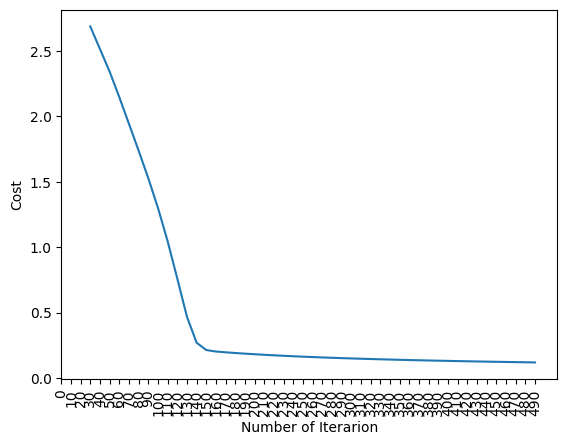

In [36]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,
           number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
parameters, gradients, cost_list = update(w, b, x_train, y_train,
                                          learning_rate = 0.01,
                                          number_of_iterarion = 500)

In [37]:
parameters

{'weight': array([[0.01271927],
        [0.01090558],
        [0.00960954],
        ...,
        [0.02505182],
        [0.0247984 ],
        [0.02571273]]),
 'bias': -0.14094993064512057}

* Woow, I get tired :) Up to this point we learn our parameters. It means we fit the data. 
* In order to predict we have parameters. Therefore, lets predict.
* In prediction step we have x_test as a input and while using it, we make forward prediction.

In [38]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = np.dot(w.T,x_test)+b
    z= 1/(1+np.exp(-z))
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.]])

* We make prediction.
* Now lets put them all together.

Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: 2.688750
Cost after iteration 40: 2.515861
Cost after iteration 50: 2.343426
Cost after iteration 60: 2.148041
Cost after iteration 70: 1.943828
Cost after iteration 80: 1.738301
Cost after iteration 90: 1.527759
Cost after iteration 100: 1.300941
Cost after iteration 110: 1.046021
Cost after iteration 120: 0.760109
Cost after iteration 130: 0.467682
Cost after iteration 140: 0.269546
Cost after iteration 150: 0.213491
Cost after iteration 160: 0.202313


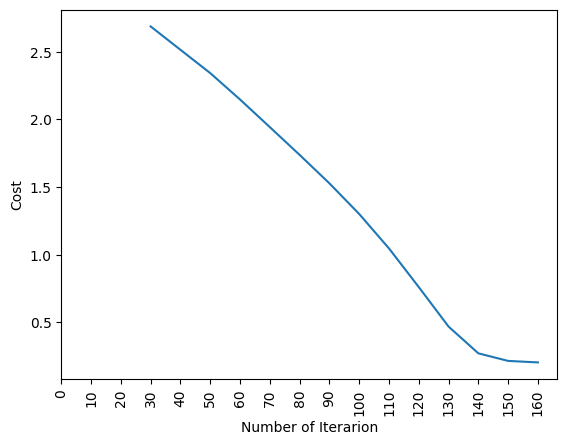

train accuracy: 93.67816091954023 %
test accuracy: 90.3225806451613 %


In [39]:
def logistic_regression(x_train, y_train, x_test, y_test, 
                        learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train,
                                              learning_rate,
                                              num_iterations)
    
    y_prediction_test = predict(parameters["weight"],
                                parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],
                                 parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 170)

* We learn logic behind simple neural network(logistic regression) and how to implement it.
* Now that we have learned logic, we can use sklearn library which is easier than implementing all steps with hand for logistic regression.




<a id="10"></a> <br>
# Artificial Neural Network (ANN)
* It is also called deep neural network or deep learning.
* **What is neural network:** It is basically taking logistic regression and repeating it at least 2 times.
* In logistic regression, there are input and output layers. However, in neural network, there is at least one hidden layer between input and output layer.
* **What is deep, in order to say "deep" how many layer do I need to have:** When I ask this question to my teacher, he said that ""Deep" is a relative term; it of course refers to the "depth" of a network, meaning how many hidden layers it has. "How deep is your swimming pool?" could be 12 feet or it might be two feet; nevertheless, it still has a depth--it has the quality of "deepness". 32 years ago, I used two or three hidden layers. That was the limit for the specialized hardware of the day. Just a few years ago, 20 layers was considered pretty deep. In October, Andrew Ng mentioned 152 layers was (one of?) the biggest commercial networks he knew of. Last week, I talked to someone at a big, famous company who said he was using "thousands". So I prefer to just stick with "How deep?""
* **Why it is called hidden:** Because hidden layer does not see inputs(training set)
* For example you have input, one hidden and output layers. When someone ask you "hey my friend how many layers do your neural network have?" The answer is "I have 2 layer neural network". Because while computing layer number input layer is ignored. 
* Lets see 2 layer neural network: 
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* Step by step we will learn this image.
    * As you can see there is one hidden layer between input and output layers. And this hidden layer has 3 nodes. If yoube curious why I choose number of node 3, the answer is there is no reason, I only choose :). Number of node is hyperparameter like learning rate. Therefore we will see hyperparameters at the end of artificial neural network.
    * Input and output layers do not change. They are same like logistic regression.
    * In image, there is a tanh function that is unknown for you. It is a activation function like sigmoid function. Tanh activation function is better than sigmoid for hidden units bacause mean of its output is closer to zero so it centers the data better for the next layer. Also tanh activation function increase non linearity that cause our model learning better.
    * As you can see with purple color there are two parts. Both parts are like logistic regression. The only difference is activation function, inputs and outputs.
        * In logistic regression: input => output
        * In 2 layer neural network: input => hidden layer => output. You can think that hidden layer is output of part 1 and input of part 2.
* Thats all. We will follow the same path like logistic regression for 2 layer neural network.
   
    
    

<a id="11"></a> <br>
## 2-Layer Neural Network
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model

<a id="12"></a> <br>
## Size of layers and initializing parameters weights and bias
* For x_train that has 348 sample $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

* At logistic regression, we initialize weights 0.01 and bias 0. At this time, we initialize weights randomly. Because if we initialize parameters zero each neuron in the first hidden layer will perform the same comptation. Therefore, even after multiple iterartion of gradiet descent each neuron in the layer will be computing same things as other neurons. Therefore we initialize randomly. Also initial weights will be small. If they are very large initially, this will cause the inputs of the tanh to be very large, thus causing gradients to be close to zero. The optimization algorithm will be slow.
* Bias can be zero initially.

In [40]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
## Forward propagation
* Forward propagation is almost same with logistic regression.
* The only difference is we use tanh function and we make all process twice.
* Also numpy has tanh function. So we do not need to implement it.

In [41]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [48]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<a id="14"></a> <br>
## Loss function and Cost function
* Loss and cost functions are same with logistic regression
* Cross entropy function
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

In [42]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="15"></a> <br>
## Backward propagation
* As you know backward propagation means derivative.
* If you want to learn (as I said I cannot explain without talking bc it is little confusing), please watch video in youtube.
* However the logic is same, lets write code.

In [43]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
## Update Parameters 
* Updating parameters also same with logistic regression.
* We actually do alot of work with logistic regression

In [44]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="17"></a> <br>
## Prediction with learnt parameters weight and bias
* Lets write predict method that is like logistic regression.

In [45]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## Create Model
* Lets put them all together

In [49]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test,
                             num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train,
                                                          y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache,
                                        x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

Cost after iteration 0: 0.370501
Cost after iteration 100: 0.351514
Cost after iteration 200: 0.344900
Cost after iteration 300: 0.337999
Cost after iteration 400: 0.317502
Cost after iteration 500: 0.279409
Cost after iteration 600: 0.234282
Cost after iteration 700: 0.164467
Cost after iteration 800: 0.147720
Cost after iteration 900: 0.123934
Cost after iteration 1000: 0.115981
Cost after iteration 1100: 0.107066
Cost after iteration 1200: 0.094175
Cost after iteration 1300: 0.083517
Cost after iteration 1400: 0.074516
Cost after iteration 1500: 0.066841
Cost after iteration 1600: 0.060385
Cost after iteration 1700: 0.055052
Cost after iteration 1800: 0.050627
Cost after iteration 1900: 0.046903
Cost after iteration 2000: 0.043738
Cost after iteration 2100: 0.041039
Cost after iteration 2200: 0.038697
Cost after iteration 2300: 0.036497
Cost after iteration 2400: 0.034296


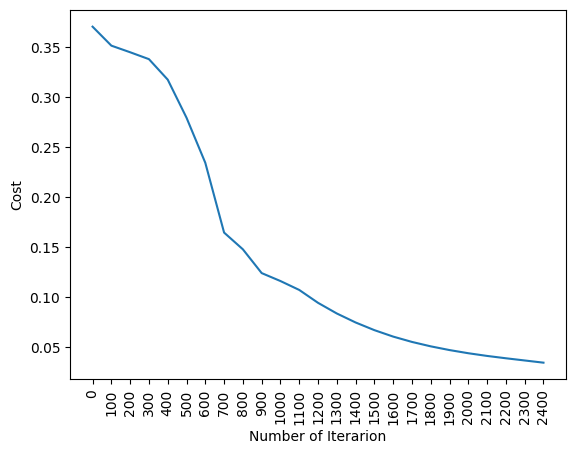

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [50]:
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

<a id="19"></a> <br>
# L Layer Neural Network
* **What happens if number of hidden layer increase:** Earlier layerls can detect simple features.
* When model composing simple features together in later layers of neural network that it can learn more and more complex functions. For example, lets look at our sign one.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* For example first hidden layer learns edges or basic shapes like line. When number of layer increase, layers start to learn more complex things like convex shapes or characteristic features like forefinger.
* Lets create our model
    * There are some hyperparameters we need to choose like learning rate, number of iterations, number of hidden layer, number of hidden units, type of activation functions. Woww it is too much :)
    * These hyperparameters can be chosen intiutively if you spend a lot of time in deep learning world.
    * However, if you do not spend too much time, the best way is to google it but it is not necessary. You need to try hyperparameters to find best one.
    * In this tutorial our model will have 2 hidden layer with 8 and4 nodes, respectively. Because when number of hidden layer and node increase, it takes too much time. 
    * As a activation function we will use relu(first hidden layer), relu(second hidden layer) and sigmoid(output layer) respectively.
    * Number of iteration will be 100.
* Our way is same with previous parts however as you learn the logic behind deep learning, we can ease our job and use keras library for deeper neural networks.
* First lets reshape our x_train, x_test, y_train and y_test.

    
    

In [51]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

<a id="22"></a> <br>
## Implementing with keras library
Lets look at some parameters of keras library:
* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is number of pixels in our images (4096 px)
* optimizer: we use adam optimizer
    * Adam is one of the most effective optimization algorithms for training neural networks.
    * Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters
* loss: Cost function is same. By the way the name of the cost function is cross-entropy cost function that we use previous parts.
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$
* metrics: it is accuracy.
* cross_val_score: use cross validation. 
* epochs: number of iteration

In [52]:
# Evaluating the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
# initialize neural network library
from tensorflow.keras.layers import Dense 
# build our layers library

In [53]:
def build_classifier():
    classifier = Sequential()#initialize neural network
    classifier.add(Dense(units = 8,
                         kernel_initializer = 'uniform',
                         activation = 'relu',
                         input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4,kernel_initializer = 'uniform',
                         activation = 'relu'))
    classifier.add(Dense(units = 1,kernel_initializer = 'uniform',
                         activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 1000)
accuracies = cross_val_score(estimator = classifier, X = x_train,y = y_train, cv = 3)
mean = accuracies.mean()
print("Accuracy mean: "+ str(mean))

Epoch 1/1000
8/8 [==============================] - 2s 9ms/step - loss: 0.6924 - accuracy: 0.5431
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6905 - accuracy: 0.5431
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.6891 - accuracy: 0.5431
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6874 - accuracy: 0.5431
Epoch 5/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.6848 - accuracy: 0.5431
Epoch 6/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.6820 - accuracy: 0.5431
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.6768 - accuracy: 0.5431
Epoch 8/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.6707 - accuracy: 0.5431
Epoch 9/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.6617 - accuracy: 0.5431
Epoch 10/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.6508 - accuracy: 0.5431
Epoch 11/100

8/8 [==============================] - 0s 7ms/step - loss: 0.0640 - accuracy: 0.9784
Epoch 84/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0619 - accuracy: 0.9741
Epoch 85/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0639 - accuracy: 0.9784
Epoch 86/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0742 - accuracy: 0.9698
Epoch 87/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0715 - accuracy: 0.9741
Epoch 88/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0945 - accuracy: 0.9655
Epoch 89/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0686 - accuracy: 0.9784
Epoch 90/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.9784
Epoch 91/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0615 - accuracy: 0.9828
Epoch 92/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0577 - accuracy: 0.9784
Epoch 93/1000
8/8 [=====

8/8 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 166/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 167/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 168/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 169/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9957
Epoch 170/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 171/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 172/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 173/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 174/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 175/1000


8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 247/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 248/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 249/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 250/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 251/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 252/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 253/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 254/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 255/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 256/1000


8/8 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 329/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 330/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 331/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 332/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 333/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 334/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 335/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 336/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 337/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 338/1000


8/8 [==============================] - 0s 9ms/step - loss: 7.6280e-04 - accuracy: 1.0000
Epoch 409/1000
8/8 [==============================] - 0s 7ms/step - loss: 8.8178e-04 - accuracy: 1.0000
Epoch 410/1000
8/8 [==============================] - 0s 6ms/step - loss: 7.7625e-04 - accuracy: 1.0000
Epoch 411/1000
8/8 [==============================] - 0s 5ms/step - loss: 8.0598e-04 - accuracy: 1.0000
Epoch 412/1000
8/8 [==============================] - 0s 5ms/step - loss: 8.1476e-04 - accuracy: 1.0000
Epoch 413/1000
8/8 [==============================] - 0s 5ms/step - loss: 8.1263e-04 - accuracy: 1.0000
Epoch 414/1000
8/8 [==============================] - 0s 5ms/step - loss: 7.2347e-04 - accuracy: 1.0000
Epoch 415/1000
8/8 [==============================] - 0s 5ms/step - loss: 8.3114e-04 - accuracy: 1.0000
Epoch 416/1000
8/8 [==============================] - 0s 5ms/step - loss: 9.0210e-04 - accuracy: 1.0000
Epoch 417/1000
8/8 [==============================] - 0s 5ms/step - loss: 7.498

8/8 [==============================] - 0s 6ms/step - loss: 4.3071e-04 - accuracy: 1.0000
Epoch 487/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.3018e-04 - accuracy: 1.0000
Epoch 488/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.3577e-04 - accuracy: 1.0000
Epoch 489/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.1001e-04 - accuracy: 1.0000
Epoch 490/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.1523e-04 - accuracy: 1.0000
Epoch 491/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.1244e-04 - accuracy: 1.0000
Epoch 492/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.1043e-04 - accuracy: 1.0000
Epoch 493/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.0110e-04 - accuracy: 1.0000
Epoch 494/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.9447e-04 - accuracy: 1.0000
Epoch 495/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.965

8/8 [==============================] - 0s 5ms/step - loss: 2.6392e-04 - accuracy: 1.0000
Epoch 565/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.6298e-04 - accuracy: 1.0000
Epoch 566/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.5050e-04 - accuracy: 1.0000
Epoch 567/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.5042e-04 - accuracy: 1.0000
Epoch 568/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.4686e-04 - accuracy: 1.0000
Epoch 569/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.4850e-04 - accuracy: 1.0000
Epoch 570/1000
8/8 [==============================] - 0s 5ms/step - loss: 2.4720e-04 - accuracy: 1.0000
Epoch 571/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.5525e-04 - accuracy: 1.0000
Epoch 572/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.3945e-04 - accuracy: 1.0000
Epoch 573/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.476

8/8 [==============================] - 0s 5ms/step - loss: 1.6414e-04 - accuracy: 1.0000
Epoch 643/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.6247e-04 - accuracy: 1.0000
Epoch 644/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.5974e-04 - accuracy: 1.0000
Epoch 645/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.5556e-04 - accuracy: 1.0000
Epoch 646/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.5575e-04 - accuracy: 1.0000
Epoch 647/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.5415e-04 - accuracy: 1.0000
Epoch 648/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.5573e-04 - accuracy: 1.0000
Epoch 649/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.5332e-04 - accuracy: 1.0000
Epoch 650/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.5203e-04 - accuracy: 1.0000
Epoch 651/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.500

8/8 [==============================] - 0s 5ms/step - loss: 1.0380e-04 - accuracy: 1.0000
Epoch 721/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0109e-04 - accuracy: 1.0000
Epoch 722/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.0300e-04 - accuracy: 1.0000
Epoch 723/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0182e-04 - accuracy: 1.0000
Epoch 724/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.0059e-04 - accuracy: 1.0000
Epoch 725/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0063e-04 - accuracy: 1.0000
Epoch 726/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0452e-04 - accuracy: 1.0000
Epoch 727/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0983e-04 - accuracy: 1.0000
Epoch 728/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.0532e-04 - accuracy: 1.0000
Epoch 729/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.015

8/8 [==============================] - 0s 10ms/step - loss: 6.8790e-05 - accuracy: 1.0000
Epoch 799/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.7149e-05 - accuracy: 1.0000
Epoch 800/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6802e-05 - accuracy: 1.0000
Epoch 801/1000
8/8 [==============================] - 0s 10ms/step - loss: 7.3706e-05 - accuracy: 1.0000
Epoch 802/1000
8/8 [==============================] - 0s 11ms/step - loss: 6.6129e-05 - accuracy: 1.0000
Epoch 803/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6526e-05 - accuracy: 1.0000
Epoch 804/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.5361e-05 - accuracy: 1.0000
Epoch 805/1000
8/8 [==============================] - 0s 5ms/step - loss: 6.6052e-05 - accuracy: 1.0000
Epoch 806/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.5455e-05 - accuracy: 1.0000
Epoch 807/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.

8/8 [==============================] - 0s 7ms/step - loss: 5.0400e-05 - accuracy: 1.0000
Epoch 877/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.6615e-05 - accuracy: 1.0000
Epoch 878/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.5209e-05 - accuracy: 1.0000
Epoch 879/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.4649e-05 - accuracy: 1.0000
Epoch 880/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.4400e-05 - accuracy: 1.0000
Epoch 881/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.3814e-05 - accuracy: 1.0000
Epoch 882/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.4638e-05 - accuracy: 1.0000
Epoch 883/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.3580e-05 - accuracy: 1.0000
Epoch 884/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.6561e-05 - accuracy: 1.0000
Epoch 885/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.396

8/8 [==============================] - 0s 10ms/step - loss: 3.2094e-05 - accuracy: 1.0000
Epoch 955/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1454e-05 - accuracy: 1.0000
Epoch 956/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.0010e-05 - accuracy: 1.0000
Epoch 957/1000
8/8 [==============================] - 0s 6ms/step - loss: 2.9795e-05 - accuracy: 1.0000
Epoch 958/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.1406e-05 - accuracy: 1.0000
Epoch 959/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.9909e-05 - accuracy: 1.0000
Epoch 960/1000
8/8 [==============================] - 0s 11ms/step - loss: 2.9290e-05 - accuracy: 1.0000
Epoch 961/1000
8/8 [==============================] - 0s 13ms/step - loss: 2.9330e-05 - accuracy: 1.0000
Epoch 962/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.9448e-05 - accuracy: 1.0000
Epoch 963/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.

8/8 [==============================] - 0s 5ms/step - loss: 0.4851 - accuracy: 0.8103
Epoch 34/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.8664
Epoch 35/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.8578
Epoch 36/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4463 - accuracy: 0.8578
Epoch 37/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4357 - accuracy: 0.9009
Epoch 38/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4250 - accuracy: 0.8793
Epoch 39/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4167 - accuracy: 0.8707
Epoch 40/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.4056 - accuracy: 0.9440
Epoch 41/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.4053 - accuracy: 0.8534
Epoch 42/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.4045 - accuracy: 0.9526
Epoch 43/1000
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9914
Epoch 116/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.9914
Epoch 117/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9828
Epoch 118/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9871
Epoch 119/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9784
Epoch 120/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9914
Epoch 121/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0886 - accuracy: 0.9914
Epoch 122/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.9871
Epoch 123/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9914
Epoch 124/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9914
Epoch 125/1000


8/8 [==============================] - 0s 7ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 198/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 199/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 200/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 201/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 202/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 203/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 204/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 205/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 206/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 207/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 280/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 281/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 282/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 283/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 284/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 285/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 286/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 287/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 288/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 289/1000


8/8 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 362/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 363/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 364/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 365/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 366/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 367/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 368/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 369/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 370/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 371/1000


8/8 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 444/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 445/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 446/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 447/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 448/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 449/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 450/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 451/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 452/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 453/1000


8/8 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 526/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 527/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 528/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 529/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 530/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 531/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 532/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 533/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 534/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 535/1000


8/8 [==============================] - 0s 4ms/step - loss: 7.8055e-04 - accuracy: 1.0000
Epoch 606/1000
8/8 [==============================] - 0s 5ms/step - loss: 7.7198e-04 - accuracy: 1.0000
Epoch 607/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.7104e-04 - accuracy: 1.0000
Epoch 608/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.6577e-04 - accuracy: 1.0000
Epoch 609/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.5755e-04 - accuracy: 1.0000
Epoch 610/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.7008e-04 - accuracy: 1.0000
Epoch 611/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.5911e-04 - accuracy: 1.0000
Epoch 612/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.4995e-04 - accuracy: 1.0000
Epoch 613/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.5521e-04 - accuracy: 1.0000
Epoch 614/1000
8/8 [==============================] - 0s 4ms/step - loss: 7.506

8/8 [==============================] - 0s 5ms/step - loss: 5.0734e-04 - accuracy: 1.0000
Epoch 684/1000
8/8 [==============================] - 0s 5ms/step - loss: 5.0623e-04 - accuracy: 1.0000
Epoch 685/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.0153e-04 - accuracy: 1.0000
Epoch 686/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.0052e-04 - accuracy: 1.0000
Epoch 687/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.0111e-04 - accuracy: 1.0000
Epoch 688/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.9505e-04 - accuracy: 1.0000
Epoch 689/1000
8/8 [==============================] - 0s 5ms/step - loss: 4.9000e-04 - accuracy: 1.0000
Epoch 690/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.8768e-04 - accuracy: 1.0000
Epoch 691/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.8518e-04 - accuracy: 1.0000
Epoch 692/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.827

8/8 [==============================] - 0s 6ms/step - loss: 3.3657e-04 - accuracy: 1.0000
Epoch 762/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.3438e-04 - accuracy: 1.0000
Epoch 763/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.3272e-04 - accuracy: 1.0000
Epoch 764/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.3118e-04 - accuracy: 1.0000
Epoch 765/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.3204e-04 - accuracy: 1.0000
Epoch 766/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.2989e-04 - accuracy: 1.0000
Epoch 767/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.2595e-04 - accuracy: 1.0000
Epoch 768/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2569e-04 - accuracy: 1.0000
Epoch 769/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2295e-04 - accuracy: 1.0000
Epoch 770/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.215

8/8 [==============================] - 0s 7ms/step - loss: 2.2637e-04 - accuracy: 1.0000
Epoch 840/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.2486e-04 - accuracy: 1.0000
Epoch 841/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2383e-04 - accuracy: 1.0000
Epoch 842/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.2261e-04 - accuracy: 1.0000
Epoch 843/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.2210e-04 - accuracy: 1.0000
Epoch 844/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.2184e-04 - accuracy: 1.0000
Epoch 845/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.2054e-04 - accuracy: 1.0000
Epoch 846/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.1928e-04 - accuracy: 1.0000
Epoch 847/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.1782e-04 - accuracy: 1.0000
Epoch 848/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.

8/8 [==============================] - 0s 7ms/step - loss: 1.5430e-04 - accuracy: 1.0000
Epoch 918/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.5294e-04 - accuracy: 1.0000
Epoch 919/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.5225e-04 - accuracy: 1.0000
Epoch 920/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.5153e-04 - accuracy: 1.0000
Epoch 921/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.5123e-04 - accuracy: 1.0000
Epoch 922/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.5062e-04 - accuracy: 1.0000
Epoch 923/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.4926e-04 - accuracy: 1.0000
Epoch 924/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.4884e-04 - accuracy: 1.0000
Epoch 925/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.4873e-04 - accuracy: 1.0000
Epoch 926/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.485

8/8 [==============================] - 0s 5ms/step - loss: 1.0541e-04 - accuracy: 1.0000
Epoch 996/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0579e-04 - accuracy: 1.0000
Epoch 997/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0595e-04 - accuracy: 1.0000
Epoch 998/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0492e-04 - accuracy: 1.0000
Epoch 999/1000
8/8 [==============================] - 0s 5ms/step - loss: 1.0386e-04 - accuracy: 1.0000
Epoch 1000/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.4048 - accuracy: 0.9397
Epoch 1/1000
8/8 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4741
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4957
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4957
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.4957
Ep

8/8 [==============================] - 0s 7ms/step - loss: 0.1713 - accuracy: 0.9784
Epoch 77/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1611 - accuracy: 0.9914
Epoch 78/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1610 - accuracy: 0.9914
Epoch 79/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1673 - accuracy: 0.9784
Epoch 80/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1536 - accuracy: 0.9871
Epoch 81/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1512 - accuracy: 0.9871
Epoch 82/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1470 - accuracy: 0.9914
Epoch 83/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1471 - accuracy: 0.9914
Epoch 84/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.1485 - accuracy: 0.9871
Epoch 85/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1431 - accuracy: 0.9871
Epoch 86/1000
8/8 [=====

8/8 [==============================] - 0s 7ms/step - loss: 0.0468 - accuracy: 0.9957
Epoch 159/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0466 - accuracy: 0.9957
Epoch 160/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 0.9957
Epoch 161/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0458 - accuracy: 0.9957
Epoch 162/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9957
Epoch 163/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9957
Epoch 164/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0445 - accuracy: 0.9957
Epoch 165/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0442 - accuracy: 0.9957
Epoch 166/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 0.9957
Epoch 167/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9957
Epoch 168/1000


8/8 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9957
Epoch 241/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9957
Epoch 242/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9957
Epoch 243/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9957
Epoch 244/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9957
Epoch 245/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9957
Epoch 246/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9957
Epoch 247/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9957
Epoch 248/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9957
Epoch 249/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9957
Epoch 250/1000


8/8 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 323/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 324/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 325/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 326/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 327/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 328/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0260 - accuracy: 0.9957
Epoch 329/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0259 - accuracy: 0.9957
Epoch 330/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0259 - accuracy: 0.9957
Epoch 331/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0258 - accuracy: 0.9957
Epoch 332/

8/8 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 404/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 405/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 406/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 407/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 408/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 409/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 410/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 411/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 412/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9957
Epoch 413/1000


8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 485/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 486/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9957
Epoch 487/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 488/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 489/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9957
Epoch 490/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 491/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 492/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 493/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 494/1000


8/8 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 567/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 568/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 569/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 570/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 571/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 572/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 573/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 574/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 575/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 576/1000


8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 649/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 650/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 651/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 652/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 653/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 654/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 655/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 656/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 657/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 658/1000

8/8 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 731/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 732/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 733/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 734/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 735/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 736/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 737/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 738/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 739/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9957
Epoch 740/1000


8/8 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 0.9957
Epoch 813/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 814/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.9957
Epoch 815/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 816/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9957
Epoch 817/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 818/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 819/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9957
Epoch 820/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 821/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 822/1000


8/8 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 895/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 896/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 897/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 898/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 899/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 900/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 901/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 902/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 903/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 904/1000


8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 977/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 978/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 979/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 980/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 981/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 982/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 983/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 984/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 985/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 986/1000
